# EcoScan Project - Waste Classification with ViT  

**Notebook:** `01_dataset_exploration.ipynb`  
**Goal:** Verify the environment, load a local image, and run a first ViT inference.  


In [1]:
# Import libraries
import os #to work with folders and file paths
from PIL import Image #to open libraries
import matplotlib.pyplot as plt #to display images in notebook

In [2]:
# Define the dataset path
# Here we point to the folder where the dataset is stored
DATA_DIR = "../data/garbage_classification"

# Safety check: verify that the dataset folder exists
assert os.path.isdir(DATA_DIR), f"Dataset not found at {DATA_DIR}"

print(f"Dataset folder found: {DATA_DIR}")

Dataset folder found: ../data/garbage_classification


In [3]:
#List all categories (subfolders inside the dataset folder)
categories = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print("Categories:", categories)
print("Total categories:", len(categories))

Categories: ['battery', 'brown-glass', 'cardboard', 'clothes', 'electronics', 'green-glass', 'metal_packaging', 'oil', 'organic', 'paper', 'plastic', 'shoes', 'tetrapak', 'trash', 'white-glass']
Total categories: 15


In [4]:
# Count the number of images per category
counts = {}
total = 0
for c in categories:
    folder = os.path.join(DATA_DIR, c)
    # Only count files that are images (.jpg, .jpeg, .png)
    n = sum(1 for f in os.listdir(folder) if f.lower().endswith((".jpg", ".jpeg", ".png")))
    counts[c] = n
    total += n

print("\nImages per class:")
for k, v in counts.items():
    print(f"  {k:12s} -> {v}")
print("TOTAL images:", total)



Images per class:
  battery      -> 945
  brown-glass  -> 607
  cardboard    -> 891
  clothes      -> 5325
  electronics  -> 195
  green-glass  -> 629
  metal_packaging -> 769
  oil          -> 183
  organic      -> 985
  paper        -> 1050
  plastic      -> 865
  shoes        -> 1977
  tetrapak     -> 129
  trash        -> 697
  white-glass  -> 775
TOTAL images: 16022


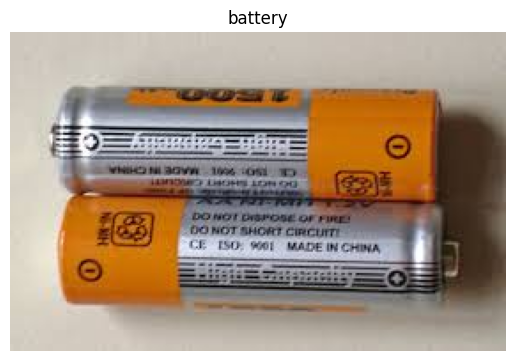

In [5]:
# Show one sample image from the first class
example_class = categories[0]  # you can change the index to see another class
folder = os.path.join(DATA_DIR, example_class)
sample_file = next(f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".jpeg", ".png")))
img_path = os.path.join(folder, sample_file)

# Open and display the image
img = Image.open(img_path).convert("RGB")
plt.imshow(img)
plt.title(example_class)
plt.axis("off")
plt.show()

In [7]:
# Import libraries from Hugging Face
from transformers import ViTImageProcessor, ViTForImageClassification
import torch

# Load pretrained model + feature extractor (ImageNet-1k)
model_name = "google/vit-base-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Preprocess the battery image (already loaded as 'img')
inputs = processor(images=img, return_tensors="pt")

# un inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get top-5 predictions
preds = torch.topk(logits, k=5).indices.squeeze().tolist()
probs = torch.softmax(logits, dim=-1).squeeze().tolist()

print("Top-5 predictions:")
for idx in preds:
    label = model.config.id2label[idx]
    score = probs[idx]
    print(f"{label:<25} -> {score:.4f}")


Top-5 predictions:
oil filter                -> 0.3387
sunscreen, sunblock, sun blocker -> 0.1368
pill bottle               -> 0.0915
lighter, light, igniter, ignitor -> 0.0214
whistle                   -> 0.0125


##### Notebook 1 — Dataset Exploration (Summary)

In this notebook we explored the dataset and confirmed that images can be loaded correctly.  
We also tested a pretrained ViT model on one sample image.  

The predictions were not correct for our task, because the model was trained on **ImageNet classes** (general objects like *oil filter* or *pill bottle*), not on our recycling categories.  

**Next steps:**  
We will create a proper train/validation split and fine-tune the ViT model on our 15 recycling classes so that predictions become relevant to our problem.
